<a href="https://colab.research.google.com/github/VitalyGladyshev/med_work/blob/main/gene_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Задание 1

In [1]:
try:
    import google.colab
    # Running on Google Colab, so install Biopython first
    !pip install biopython
except ImportError:
    pass


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 27.0 MB/s eta 0:00:00


In [2]:
from Bio import Entrez
from Bio import SeqIO
Entrez.email = "A.N.Other@example.com"
import pandas as pd
import xml.etree.ElementTree as ET

### Загрузка базы

In [ ]:
# from google.colab import drive
# drive.mount('/gdrive')
# %cd /gdrive

In [3]:
dis = pd.read_table("curated_gene_disease_associations.tsv")       # ('/gdrive/MyDrive/data/curated_gene_disease_associations.tsv')
dis

,geneId,geneSymbol,DSI,DPI,diseaseId,diseaseName,diseaseType,diseaseClass,diseaseSemanticType,score,EI,YearInitial,YearFinal,NofPmids,NofSnps,source
0,1,A1BG,0.857,0.172,C0019209,Hepatomegaly,phenotype,C06;C23,Finding,0.3,NaN,2017.0,2017.0,1,0,CTD_human
1,1,A1BG,0.857,0.172,C0036341,Schizophrenia,disease,F03,Mental or Behavioral Dysfunction,0.3,NaN,2015.0,2015.0,1,0,CTD_human
2,2,A2M,0.564,0.724,C0002395,Alzheimer's Disease,disease,C10;F03,Disease or Syndrome,0.4,0.848485,1998.0,2016.0,3,0,CTD_human
3,2,A2M,0.564,0.724,C0007102,Malignant tumor of colon,disease,C04;C06,Neoplastic Process,0.3,NaN,2004.0,2004.0,1,0,CTD_human
4,2,A2M,0.564,0.724,C0009375,Colonic Neoplasms,group,C04;C06,Neoplastic Process,0.3,NaN,2004.0,2004.0,1,0,CTD_human
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81741,109580095,HBB-LCR,0.815,0.069,C0002875,Cooley's anemia,disease,C15;C16,Disease or Syndrome,0.3,NaN,NaN,NaN,0,0,CTD_human
81742,109580095,HBB-LCR,0.815,0.069,C0005283,beta Thalassemia,disease,C15;C16,Disease or Syndrome,0.3,NaN,NaN,NaN,0,0,CTD_human
81743,109580095,HBB-LCR,0.815,0.069,C0019025,Hemoglobin F Disease,disease,C15;C16,Disease or Syndrome,0.3,NaN,NaN,NaN,0,0,CTD_human
81744,109580095,HBB-LCR,0.815,0.069,C0085578,Thalassemia Minor,disease,C15;C16,Disease or Syndrome,0.3,NaN,NaN,NaN,0,0,CTD_human


In [ ]:
schis_db = dis.loc[dis['diseaseName'] == 'Schizophrenia']
schis_db

,geneId,geneSymbol,DSI,DPI,diseaseId,diseaseName,diseaseType,diseaseClass,diseaseSemanticType,score,EI,YearInitial,YearFinal,NofPmids,NofSnps,source
1,1,A1BG,0.857,0.172,C0036341,Schizophrenia,disease,F03,Mental or Behavioral Dysfunction,0.30,NaN,2015.0,2015.0,1,0,CTD_human
180,19,ABCA1,0.484,0.793,C0036341,Schizophrenia,disease,F03,Mental or Behavioral Dysfunction,0.31,1.0,2014.0,2014.0,1,0,PSYGENET
397,43,ACHE,0.494,0.793,C0036341,Schizophrenia,disease,F03,Mental or Behavioral Dysfunction,0.30,1.0,2015.0,2015.0,1,0,PSYGENET
505,52,ACP1,0.582,0.655,C0036341,Schizophrenia,disease,F03,Mental or Behavioral Dysfunction,0.32,1.0,1990.0,2018.0,1,0,PSYGENET
598,60,ACTB,0.453,0.862,C0036341,Schizophrenia,disease,F03,Mental or Behavioral Dysfunction,0.31,1.0,2012.0,2012.0,1,0,PSYGENET
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81506,100302690,DLG2-AS1,1.000,0.034,C0036341,Schizophrenia,disease,F03,Mental or Behavioral Dysfunction,0.31,1.0,2003.0,2003.0,1,0,PSYGENET
81509,100303453,TSNAX-DISC1,0.815,0.069,C0036341,Schizophrenia,disease,F03,Mental or Behavioral Dysfunction,0.31,1.0,2010.0,2013.0,2,0,PSYGENET
81661,100616452,MIR2682,0.928,0.034,C0036341,Schizophrenia,disease,F03,Mental or Behavioral Dysfunction,0.31,1.0,2015.0,2015.0,1,1,PSYGENET
81663,100616496,ERVW-4,0.676,0.517,C0036341,Schizophrenia,disease,F03,Mental or Behavioral Dysfunction,0.32,1.0,2001.0,2006.0,2,0,PSYGENET


In [ ]:
dis_name_arr = dis['diseaseName'].unique()
dis_name_arr

array(['Hepatomegaly', 'Schizophrenia', "Alzheimer's Disease", ...,
       'SPINOCEREBELLAR ATAXIA 32', 'DYSTONIA 21',
       'North Carolina macular dystrophy'], dtype=object)

In [ ]:
dis['diseaseName'].nunique()

10370

In [4]:
des_sample_list = ["Myoclonic Astatic Epilepsy", 'Depression, Bipolar']

In [5]:
dis_MAE = dis.loc[dis['diseaseName'] == des_sample_list[0]]
dis_MAE

,geneId,geneSymbol,DSI,DPI,diseaseId,diseaseName,diseaseType,diseaseClass,diseaseSemanticType,score,EI,YearInitial,YearFinal,NofPmids,NofSnps,source
9137,1106,CHD2,0.624,0.310,C0393702,Myoclonic Astatic Epilepsy,disease,C10,Disease or Syndrome,0.41,1.0,2016.0,2016.0,0,0,ORPHANET
40665,5376,PMP22,0.506,0.690,C0393702,Myoclonic Astatic Epilepsy,disease,C10,Disease or Syndrome,0.30,NaN,2007.0,2007.0,1,0,CTD_human
41074,5443,POMC,0.382,0.862,C0393702,Myoclonic Astatic Epilepsy,disease,C10,Disease or Syndrome,0.30,NaN,1984.0,1984.0,1,0,CTD_human
45791,6323,SCN1A,0.506,0.517,C0393702,Myoclonic Astatic Epilepsy,disease,C10,Disease or Syndrome,0.30,NaN,2011.0,2011.0,1,0,CTD_human
46007,6335,SCN9A,0.569,0.552,C0393702,Myoclonic Astatic Epilepsy,disease,C10,Disease or Syndrome,0.30,NaN,NaN,NaN,0,0,CTD_human
47437,6529,SLC6A1,0.607,0.310,C0393702,Myoclonic Astatic Epilepsy,disease,C10,Disease or Syndrome,0.41,1.0,2015.0,2015.0,0,0,ORPHANET
49981,6812,STXBP1,0.596,0.483,C0393702,Myoclonic Astatic Epilepsy,disease,C10,Disease or Syndrome,0.30,NaN,2008.0,2008.0,1,0,CTD_human
59947,9693,RAPGEF2,0.752,0.069,C0393702,Myoclonic Astatic Epilepsy,disease,C10,Disease or Syndrome,0.30,NaN,2018.0,2018.0,1,0,CTD_human
66574,27327,TNRC6A,0.735,0.138,C0393702,Myoclonic Astatic Epilepsy,disease,C10,Disease or Syndrome,0.30,NaN,2018.0,2018.0,1,0,CTD_human
79211,401474,SAMD12,0.752,0.103,C0393702,Myoclonic Astatic Epilepsy,disease,C10,Disease or Syndrome,0.30,NaN,2018.0,2018.0,1,0,CTD_human


In [6]:
dis_MAE['geneId']

9137       1106
40665      5376
41074      5443
45791      6323
46007      6335
47437      6529
49981      6812
59947      9693
66574     27327
79211    401474
Name: geneId, dtype: int64

In [7]:
dis_DB = dis.loc[dis['diseaseName'] == des_sample_list[1]]
dis_DB

,geneId,geneSymbol,DSI,DPI,diseaseId,diseaseName,diseaseType,diseaseClass,diseaseSemanticType,score,EI,YearInitial,YearFinal,NofPmids,NofSnps,source
85,15,AANAT,0.696,0.414,C0005587,"Depression, Bipolar",disease,F03,Mental or Behavioral Dysfunction,0.31,1.0,2010.0,2010.0,1,0,PSYGENET
1453,157,GRK3,0.672,0.448,C0005587,"Depression, Bipolar",disease,F03,Mental or Behavioral Dysfunction,0.30,NaN,2004.0,2004.0,1,0,CTD_human
2720,288,ANK3,0.602,0.379,C0005587,"Depression, Bipolar",disease,F03,Mental or Behavioral Dysfunction,0.30,NaN,2009.0,2011.0,2,0,CTD_human
5615,627,BDNF,0.382,0.828,C0005587,"Depression, Bipolar",disease,F03,Mental or Behavioral Dysfunction,0.32,1.0,2005.0,2018.0,2,0,CTD_human
6663,775,CACNA1C,0.575,0.517,C0005587,"Depression, Bipolar",disease,F03,Mental or Behavioral Dysfunction,0.30,NaN,2009.0,2011.0,3,0,CTD_human
6689,776,CACNA1D,0.594,0.483,C0005587,"Depression, Bipolar",disease,F03,Mental or Behavioral Dysfunction,0.30,NaN,2017.0,2017.0,1,0,CTD_human
9160,1109,AKR1C4,0.659,0.586,C0005587,"Depression, Bipolar",disease,F03,Mental or Behavioral Dysfunction,0.30,NaN,2011.0,2011.0,1,0,CTD_human
10899,1312,COMT,0.426,0.897,C0005587,"Depression, Bipolar",disease,F03,Mental or Behavioral Dysfunction,0.51,0.5,2002.0,2006.0,3,0,CTD_human;PSYGENET
14752,1812,DRD1,0.555,0.517,C0005587,"Depression, Bipolar",disease,F03,Mental or Behavioral Dysfunction,0.30,NaN,2009.0,2009.0,1,0,CTD_human
15041,1816,DRD5,0.636,0.241,C0005587,"Depression, Bipolar",disease,F03,Mental or Behavioral Dysfunction,0.30,NaN,2005.0,2005.0,1,0,CTD_human


In [8]:
len(dis_DB['geneId'])

53

### Извлечение информации ДНК

In [11]:
def search_chromosome(gi_id, start, end):
    handle = Entrez.efetch(db="nucleotide",
                       id=gi_id,
                       rettype = 'fasta',
                       retmode = 'text')
    #загружаем
    chromosome = SeqIO.read(handle, 'fasta')
    res = [chromosome.id, chromosome.seq[start:end], chromosome.description]
    handle.close()
    return res

In [12]:
# Получаем из NCBI информацию о генах из списка 'gene_id_list', в том числе ID хромосомы.
def get_gene_info(gene_id_list):
    gene_info = []
    for gene_id in gene_id_list:
        handle = Entrez.efetch(db="gene", id=str(gene_id), rettype = 'xml')
        gene_locus = ET.parse(handle).getroot().find("Entrezgene/Entrezgene_locus")
        region = gene_locus.find("Gene-commentary/Gene-commentary_seqs/Seq-loc/Seq-loc_int/Seq-interval")
        start = int(region.find("Seq-interval_from").text) + 1
        end = int(region.find("Seq-interval_to").text) + 1
        gi_id = region.find("Seq-interval_id/Seq-id/Seq-id_gi").text
        strand = region.find("Seq-interval_strand/Na-strand").get("value")
        # print(start, end, gi_id, strand)
        nuc = search_chromosome(gi_id, start, end)
        gene_info.append({'gene_id': gene_id, 'start': start, 'end': end, 'gi_id': gi_id, 'nucleotide': nuc[0], 'gene_sym': nuc[1], 'description': nuc[2], 'strand': strand})
    return gene_info

In [13]:
# Получаем нуклеотидную последовательность гена. параметры берём из 'gene_info_list'
def get_dna_sequence(gene_seq_keys_list):
    for nucleotid in gene_seq_keys_list:
        print(('=' * 100) + '\n')
        handle = Entrez.efetch(db="gene", id=int(nucleotid['gene_id']), rettype="gb", retmode="text")
        myline = handle.readline()
        while myline:
            print(myline)
            myline = handle.readline()
        handle.close()
        gene_sym = nucleotid['gene_sym']
        # print(f'Gene ID: {nucleotid["gene_id"]}')
        print('Chromosome description: ' + nucleotid['description'])
        print(f"gene_id: {nucleotid['gene_id']} start: {nucleotid['start']} end: {nucleotid['end']} gi_id: {nucleotid['gi_id']} nucleotide: {nucleotid['nucleotide']}, strand: {nucleotid['strand']}")
        if len(gene_sym) > 100:
            print(f"Gene sequence: {gene_sym[:100]}...")
        else:
            print('Gene sequence: ' + gene_sym)
        print('Gene sequence length: ' + str(len(gene_sym)) + '\n')

    print(('=' * 100) + '\n')

In [9]:
gene_id_list = dis_MAE['geneId'].values
gene_id_list

array([  1106,   5376,   5443,   6323,   6335,   6529,   6812,   9693,
        27327, 401474])

In [14]:
%%time
# Формируем список по всем генам
gene_info_list = get_gene_info(gene_id_list)

CPU times: user 17.1 s, sys: 5.25 s, total: 22.3 s
Wall time: 4min


In [ ]:
get_dna_sequence(gene_info_list)




1. CHD2

Official Symbol: CHD2 and Name: chromodomain helicase DNA binding protein 2 [Homo sapiens (human)]

Other Aliases: DEE94, EEOC

Other Designations: chromodomain-helicase-DNA-binding protein 2; ATP-dependent helicase CHD2; CHD-2

Chromosome: 15; Location: 15q26.1

Annotation: Chromosome 15 NC_000015.10 (92900324..93027996)

MIM: 602119

ID: 1106



Chromosome description: NC_000015.10 Homo sapiens chromosome 15, GRCh38.p14 Primary Assembly
gene_id: 1106 start: 92900324 end: 93027996 gi_id: 568815583 nucleotide: NC_000015.10, strand: plus
Gene sequence: GAGCTGGGAAGGAGGCTCTAGATGGCGGCTGTGCCTTAGAGAGAGCGCGCTCTGCTCCCTGCCTTTGCCTCACTTTACGCAACTTTCCCTAACTTTCGGG...
Gene sequence length: 127672




1. PMP22

Official Symbol: PMP22 and Name: peripheral myelin protein 22 [Homo sapiens (human)]

Other Aliases: CIDP, CMT1A, CMT1E, DSS, GAS-3, GAS3, HMSNIA, HNPP, Sp110

Other Designations: peripheral myelin protein 22; Charcot-Marie-Tooth neuropathy 1A (greatly reduced nerve conduction veloc

## Задание 2

### Репликация

In [ ]:
for nucleotid in gene_info_list:
    #Slicing a sequence
    start = 10
    end = 20
    seq_slice = nucleotid['gene_sym'][start:end]

    m_rna = seq_slice.transcribe()
    #Nucleotide sequences and (reverse) complements
    print(f"Gene ID: {nucleotid['gene_id']} slice[{start}:{end}]: {seq_slice} complement: {seq_slice.complement()} transcribe: {m_rna} translate: {m_rna.translate()}")

    outputname = f"gene-{nucleotid['gene_id']}-slice{start}-{end}-prot.fasta"
    print(outputname)


Gene ID: 1106 slice[10:20]: GGAGGCTCTA complement: CCTCCGAGAT transcribe: GGAGGCUCUA translate: GGS
gene-1106-slice10-20-prot.fasta
Gene ID: 5376 slice[10:20]: GATGTTTATT complement: CTACAAATAA transcribe: GAUGUUUAUU translate: DVY
gene-5376-slice10-20-prot.fasta
Gene ID: 5443 slice[10:20]: CGTATTTTTA complement: GCATAAAAAT transcribe: CGUAUUUUUA translate: RIF
gene-5443-slice10-20-prot.fasta
Gene ID: 6323 slice[10:20]: TTGCATTCCA complement: AACGTAAGGT transcribe: UUGCAUUCCA translate: LHS
gene-6323-slice10-20-prot.fasta
Gene ID: 6335 slice[10:20]: ATAACTTTTA complement: TATTGAAAAT transcribe: AUAACUUUUA translate: ITF
gene-6335-slice10-20-prot.fasta
Gene ID: 6529 slice[10:20]: ACCGAGACAG complement: TGGCTCTGTC transcribe: ACCGAGACAG translate: TET
gene-6529-slice10-20-prot.fasta
Gene ID: 6812 slice[10:20]: AGACAGGACC complement: TCTGTCCTGG transcribe: AGACAGGACC translate: RQD
gene-6812-slice10-20-prot.fasta
Gene ID: 9693 slice[10:20]: CCGGCGGCCG complement: GGCCGCCGGC transcribe: CC

/usr/local/lib/python3.10/dist-packages/Bio/Seq.py:2880: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


In [ ]:
# Загрузка информации обо всех транскрипциях гена из списка
def get_transcriptions_info(transcript_id_list):
    transcript_info = []
    for i in transcript_id_list:
        print(f"{i['nucleotide']}\n")
        handle = Entrez.efetch(db="nuccore",
                               id=i["nucleotide"],
                               rettype="gb",
                               retmode="text")
        info = SeqIO.read(handle, "gb")
        print(info)
        if str(info.name).find("NC") and str(info.name).find("NG"):
            transcript_info.append({"name":info.name, "seq":info.seq})
            print(f"name: {info.name} seq: {info.seq}")
        print()
    return transcript_info

In [ ]:
gene_id_list.tolist()

[1106, 5376, 5443, 6323, 6335, 6529, 6812, 9693, 27327, 401474]

In [ ]:
gene_info_list[0]

{'gene_id': 1106,
 'start': 92900324,
 'end': 93027996,
 'gi_id': '568815583',
 'nucleotide': 'NC_000015.10',
 'gene_sym': Seq('GAGCTGGGAAGGAGGCTCTAGATGGCGGCTGTGCCTTAGAGAGAGCGCGCTCTG...GAA'),
 'description': 'NC_000015.10 Homo sapiens chromosome 15, GRCh38.p14 Primary Assembly',
 'strand': 'plus'}

In [ ]:
info = get_transcriptions_info(gene_info_list[:2])

NC_000015.10

ID: NC_000015.10
Name: NC_000015
Description: Homo sapiens chromosome 15, GRCh38.p14 Primary Assembly
Database cross-references: BioProject:PRJNA168, Assembly:GCF_000001405.40
Number of features: 1
/molecule_type=DNA
/topology=linear
/data_file_division=CON
/date=07-OCT-2023
/accessions=['NC_000015']
/sequence_version=10
/keywords=['RefSeq']
/source=Homo sapiens (human)
/organism=Homo sapiens
/taxonomy=['Eukaryota', 'Metazoa', 'Chordata', 'Craniata', 'Vertebrata', 'Euteleostomi', 'Mammalia', 'Eutheria', 'Euarchontoglires', 'Primates', 'Haplorrhini', 'Catarrhini', 'Hominidae', 'Homo']
/references=[Reference(title='Analysis of the DNA sequence and duplication history of human chromosome 15', ...), Reference(title='Finishing the euchromatic sequence of the human genome', ...), Reference(title='Initial sequencing and analysis of the human genome', ...)]
/comment=REFSEQ INFORMATION: The reference sequence is identical to
CM000677.2.
On Feb 3, 2014 this sequence version replace

In [ ]:
info

[]

In [ ]:
#Выгрузить с NCBI нуклеотидную последовательность X хромосомы, для этого узнать ID хромосомы - NC_000023.11
handle = Entrez.efetch(db="nucleotide",
                       id=gene_info_list[0]['nucleotide'], # "NC_000023.11",
                       rettype = 'fasta',
                       retmode = 'text')
#загружаем
chromosome = SeqIO.read(handle, 'fasta')

chromosome.description

'NC_000015.10 Homo sapiens chromosome 15, GRCh38.p14 Primary Assembly'

## Задание 3

### Мутации

In [ ]:
chr = "NC_000015.10"
pos = "92900324"
gene_id = 1106
query = f"{pos}[POSITION] AND {chr[7:7+2]}[CHR]"
query

'92900324[POSITION] AND 15[CHR]'

In [ ]:
Entrez.api_key = None

# dbSNP supported query terms (https://www.ncbi.nlm.nih.gov/snp/docs/entrez_help/)
eShandle = Entrez.esearch(db="snp",  # search dbSNP
                          #complex query for missense and pathogenic variants in LPL gene with global MAF betweeen 0 and 0.01.
                          term=query, #'92900324[POSITION] AND 15[CHR]',
                          usehistory="y", #cache result on server for download in batches
                          retmax=20 # return 20 RSID max
                         )

In [ ]:
# get esearch result
eSresult = Entrez.read(eShandle)

In [ ]:
# review results
for k in eSresult:
    print (k, ":", eSresult[k])

Count : 2
RetMax : 2
RetStart : 0
QueryKey : 1
WebEnv : MCID_663e6dd8420d157c377f20c1
IdList : ['2052511553', '1437590069']
TranslationSet : []
TranslationStack : [{'Term': '92900324[POSITION]', 'Field': 'POSITION', 'Count': '11', 'Explode': 'N'}, {'Term': '15[CHR]', 'Field': 'CHR', 'Count': '32072550', 'Explode': 'N'}, 'AND']
QueryTranslation : 92900324[POSITION] AND 15[CHR]


In [ ]:
# get result RSIDs list 'Idlist'
# total rs count
rslist = (eSresult['IdList'])

In [ ]:
for rs in rslist:
    print(rs)

2052511553
1437590069


In [ ]:
# get the WebEnv session cookie, and the QueryKey:

webenv = eSresult["WebEnv"]
print(webenv)
query_key = eSresult["QueryKey"]
print(query_key)
total_count = int(eSresult["Count"])
print(total_count)
retmax = 2 # return 2 rs per batch example

MCID_663e6dd8420d157c377f20c1
1
2


In [ ]:
# sample codes adopted with modifications from http://biopython.org/DIST/docs/tutorial/Tutorial.html#htoc139.
fetch_count = 0
for start in range(0, total_count, retmax):
    end = min(total_count, start+retmax)
    print("Going to download record %i to %i" % (start+1, end))
    attempt = 0
    #fetch_count += 1
    while (attempt < 3):
        attempt += 1
        try:
            fetch_handle = Entrez.efetch(db="snp",
                                         #rettype="uilist", #available types [uilist | xml (use retmode=xml))
                                         retmode="text",
                                         retstart=start,
                                         retmax=retmax,
                                         webenv=webenv,
                                         query_key=query_key )
        except HTTPError as err:
            if 500 <= err.code <= 599:
                print("Received error from server %s" % err)
                print("Attempt %i of 3" % attempt)
                time.sleep(15)
            else:
                raise
    if (fetch_handle):
        #print(fetch_handle)
        data = fetch_handle.read()
        print(data)
        fetch_handle.close()

Going to download record 1 to 2
<DocumentSummary uid="2052511553"><SNP_ID>2052511553</SNP_ID><ALLELE_ORIGIN/><GLOBAL_MAFS><MAF><STUDY>TOPMED</STUDY><FREQ>-=0.000008/2</FREQ></MAF><MAF><STUDY>ALFA</STUDY><FREQ>AGAG=0./0</FREQ></MAF></GLOBAL_MAFS><GLOBAL_POPULATION/><GLOBAL_SAMPLESIZE>0</GLOBAL_SAMPLESIZE><SUSPECTED/><CLINICAL_SIGNIFICANCE/><GENES><GENE_E><NAME>CHD2</NAME><GENE_ID>1106</GENE_ID></GENE_E></GENES><ACC>NC_000015.10</ACC><CHR>15</CHR><HANDLE>TOPMED</HANDLE><SPDI>NC_000015.10:92900323:AGAG:AG</SPDI><FXN_CLASS>5_prime_UTR_variant</FXN_CLASS><VALIDATED>by-frequency,by-alfa</VALIDATED><DOCSUM>HGVS=NC_000015.10:g.92900324AG[1],NC_000015.9:g.93443554AG[1],NG_012826.2:g.5004AG[1],NM_001271.4:c.-572AG[1],NM_001271.3:c.-572AG[1],NM_001042572.3:c.-572AG[1],NM_001042572.2:c.-572AG[1]|SEQ=[AG/-]|LEN=4|GENE=CHD2:1106</DOCSUM><TAX_ID>9606</TAX_ID><ORIG_BUILD>155</ORIG_BUILD><UPD_BUILD>156</UPD_BUILD><CREATEDATE>2021/04/27 04:59</CREATEDATE><UPDATEDATE>2022/10/16 22:45</UPDATEDATE><SS>5001

In [ ]:
st = data.find("<SPDI>")
fn = data.find("</SPDI>")
data[st+len("<SPDI>"):fn]

'NC_000015.10:92900323:AGAG:AG'

In [ ]:
st = data.find("<SNP_ID>")
fn = data.find("</SNP_ID>")
data[st+len("<SNP_ID>"):fn]

'2052511553'

In [ ]:
# Получаем мутации
def get_mutations(chr, start, gene_id):
    if chr[7] == '0':
        query = f"{gene_id}[GENE_ID] AND {chr[8:8+1]}[CHR] AND pathogenic[Clinical_Significance]"
    else:
        query = f"{gene_id}[GENE_ID] AND {chr[7:7+2]}[CHR] AND pathogenic[Clinical_Significance]"   # f"{start}[POSITION] AND {chr[7:7+2]}[CHR]"
    print(f"\t{query}")
    Entrez.api_key = None

    eShandle = Entrez.esearch(db="snp",  # search dbSNP
                              term=query, #'92900324[POSITION] AND 15[CHR]',
                              usehistory="y", #cache result on server for download in batches
                              retmax=20 # return 20 RSID max
                              )
    eSresult = Entrez.read(eShandle)
    # print(eSresult['IdList'])
    return eSresult

In [ ]:
def get_mutations_info(eSresult, mut_id):
    webenv = eSresult["WebEnv"]
    query_key = eSresult["QueryKey"]
    total_count = int(eSresult["Count"])

    disp = 0
    for i, id in enumerate(eSresult['IdList']):
        if id == mut_id:
            disp = i

    fetch_handle = Entrez.efetch(db="snp",
                                #rettype="uilist", #available types [uilist | xml (use retmode=xml))
                                retmode="text",
                                retstart=disp,
                                retmax=1,
                                webenv=webenv,
                                query_key=query_key )
    if (fetch_handle):
        data = fetch_handle.read()

        st = data.find("<CLINICAL_SIGNIFICANCE>")
        fn = data.find("</CLINICAL_SIGNIFICANCE>")
        print(f"\t\trs: {mut_id}: {data[st+len('<CLINICAL_SIGNIFICANCE>'):fn]}")

        fetch_handle.close()

    return data

In [ ]:
# Получаем мутации
def get_mutations_scr(gene_seq_keys_list):
    for nucleotid in gene_seq_keys_list:
        print(('=' * 100) + '\n')
        handle = Entrez.efetch(db="gene", id=int(nucleotid['gene_id']), rettype="gb", retmode="text")
        handle.close()
        gene_sym = nucleotid['gene_sym']
        print(f"gene_id: {nucleotid['gene_id']} start: {nucleotid['start']} end: {nucleotid['end']} gi_id: {nucleotid['gi_id']} nucleotide: {nucleotid['nucleotide']}, strand: {nucleotid['strand']}")

        info = get_mutations(nucleotid['nucleotide'], nucleotid['start'], nucleotid['gene_id'])
        if info:
            print(f"\tmutations: count: {info['Count']} id: {info['IdList']}")
        else:
            print(f"\tempty")

        if len(info['IdList']) >= 2:
            data = get_mutations_info(info, info['IdList'][0])
            data = get_mutations_info(info, info['IdList'][1])
            data = get_mutations_info(info, info['IdList'][2])

    print(('=' * 100) + '\n')

In [ ]:
get_mutations_scr(gene_info_list)


gene_id: 1106 start: 92900324 end: 93027996 gi_id: 568815583 nucleotide: NC_000015.10, strand: plus
	1106[GENE_ID] AND 15[CHR] AND pathogenic[Clinical_Significance]
	mutations: count: 140 id: ['2141895289', '2141895144', '2141881688', '2141876542', '2141876515', '2141873672', '2141873663', '2141867643', '2141867280', '2141852057', '2141852009', '2141851983', '2141851950', '2141850583', '2141846356', '2141844251', '2141844243', '2141844219', '2141844210', '2141843235']
		rs: 2141895289: pathogenic
		rs: 2141895144: pathogenic
		rs: 2141881688: pathogenic

gene_id: 5376 start: 15229779 end: 15265326 gi_id: 568815581 nucleotide: NC_000017.11, strand: minus
	5376[GENE_ID] AND 17[CHR] AND pathogenic[Clinical_Significance]
	mutations: count: 47 id: ['2150676904', '1909248652', '1909244614', '1906294453', '1906290133', '1597635540', '1597633171', '1597608225', '1597607651', '1597607532', '1597607514', '1597597900', '1597597534', '1597597527', '1567719258', '1567704791', '1567704621', '156769

## Задание 4

### AlphaFold прогнозирование структуры белков

In [15]:
gene_info_list[2]

{'gene_id': 5443,
 'start': 25160860,
 'end': 25168580,
 'gi_id': '568815596',
 'nucleotide': 'NC_000002.12',
 'gene_sym': Seq('TTGACGGCTACGTATTTTTACTTTATTCACACAGTTTACATTCAAAGTCAGAGG...GCC'),
 'description': 'NC_000002.12 Homo sapiens chromosome 2, GRCh38.p14 Primary Assembly',
 'strand': 'minus'}

In [18]:
seq = gene_info_list[2]['gene_sym']

m_rna = seq.transcribe()

print(f"Gene ID: {gene_info_list[2]['gene_id']}\n\tseq: {seq}\n\tcomplement: {seq.complement()}\n\ttranscribe: {m_rna}\n\ttranslate: {m_rna.translate()}")

outputname = f"gene-{gene_info_list[2]['gene_id']}-prot.fasta"
print(outputname)

Gene ID: 5443
	seq: TTGACGGCTACGTATTTTTACTTTATTCACACAGTTTACATTCAAAGTCAGAGGTGGATGTGAAATTTGAAAGGTTTTATTTCCTAACTACAGGCAGCTTTAAGAGGCTGATTATCTGCCACGACCCCCCAGGCTGGGAGGCGGCAGCAGGGCAGGGGAGAGCAAGGGGCTTTGGGGTCGACCTCCTGGGGGAGGGTAGCCCTGGGGCCCCGCTGTGCCCTCACTCGCCCTTCTTGTAGGCGTTCTTGATGATGGCGTTTTTGAACAGCGTCACCAGGGGCGTCTGGCTCTTCTCGGAGGTCATGAAACCGCCGTAGCGCTTGTCCTTGGGCGGGCTGCCCCAGCGGAAGTGCTCCATCCTGTAGGGGCCCTCGTCCTTCTTCTCGGCCGCCACCAGCAGGCTGTGCTCCAGGTCGGCCTGGGCCCCTGCGCCGTCATCGGCAGGGCCGTCGGGGCCATCTCCCTCCCGGAGTCGCTGGCCAGTCAGCTCCCTCTTGAACTCCAGGGGGAAGGCCTCGGCCGACTCGTCCTCGGCGCCGTTAGGGTACACCTTCACTGGGCGCCGCTTCTTGCCCACCGGCTTGCCCCAGCGGAAGTGCTCCATGGAGTAGGAGCGCTTGCCCTCGCGCGGGCCCGGCTTGGCACCATCGCTGCGGGGCTCGGGGCCGCCCTCAGGCAGCGGGCCGCAGTCTTCGCCCGCTGAGACGTCCTCGCGCTTCTGCCCTGCGCCGCTGCTGCCGCTGCTGCTGCTGTTGCGGCGGCCGAATCGGTCCCAGCGGAAGTGGCCCATGACGTACTTCCGGGGGTTCTCGGTCAGAGGCTGCTCGTCGCCATTTCCCGGGAACATGGGAGTCTCGGCCGAGAGGTCGGGCTTGCAGGCCCGGATGCACTCCTGGGGGAAGACGCGAGGGCATGAGGGCAGCCCGTGCCCCGCACCCCGGCCCGGCTGCCGCGCCCGTCACTGCGCCTAGGCCCTGGCC

/usr/local/lib/python3.10/dist-packages/Bio/Seq.py:2880: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


In [22]:
t_p_seq = m_rna.translate()
t_p_seq

/usr/local/lib/python3.10/dist-packages/Bio/Seq.py:2880: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


Seq('LTATYFYFIHTVYIQSQRWM*NLKGFIS*LQAALRG*LSATTPQAGRRQQGRGE...LRR')

In [23]:
amino_acids = t_p_seq.split('*')
amino_acids

[Seq('LTATYFYFIHTVYIQSQRWM'),
 Seq('NLKGFIS'),
 Seq('LQAALRG'),
 Seq('LSATTPQAGRRQQGRGEQGALGSTSWGRVALGPRCALTRPSCRRS'),
 Seq(''),
 Seq('WRF'),
 Seq('TASPGASGSSRRS'),
 Seq('NRRSACPWAGCPSGSAPSCRGPRPSSRPPPAGCAPGRPGPLRRHRQGRRGHLPP...APS'),
 Seq('TPGGRPRPTRPRRR'),
 Seq('GTPSLGAASCPPACPSGSAPWSRSACPRAGPAWHHRCGARGRPQAAGRSLRPLR...SGP'),
 Seq('RTSGGSRSEAARRHFPGTWESRPRGRACRPGCTPGGRREGMRAARAPHPGPAAA...VGI'),
 Seq('DLATASFVPSPSCFCLATATHFPSHSMVCLAI'),
 Seq('PPLAFVNRTKVLLLYA'),
 Seq('HKGVAPRKADGW'),
 Seq('LLALNEY'),
 Seq('GPGTVAHTYNPSTLGGQGRQIT'),
 Seq('GQEFKTSLANYGEIPSLV'),
 Seq('INK'),
 Seq('AGCGGGRL'),
 Seq('SQLLWSLRQENRLNLGGRGCSEPRSHHCTPHSSQGNRARLRLKKINK'),
 Seq('IKRILNKYIWFNSSPGGEWG'),
 Seq('NLGDNLSR'),
 Seq(''),
 Seq('KSGY'),
 Seq('GPYF'),
 Seq('TYF'),
 Seq(''),
 Seq('CLNLCEPGRWSLQ'),
 Seq('GEIAPLHSSLGDRARLRLKKINK'),
 Seq('TKNKK'),
 Seq('CLNLTSVMKNLLYALPQLHLCTKPPKLHLGSFTTSELISERSPSELWGKLISL'),
 Seq('SHSDWREGWKASVISIAPSVEPVSLLLVPRGLYCGTY'),
 Seq('LRKMAA'),
 Seq('AAALSFQ'),
 Seq(''),
 Seq('KDEKLTG

In [30]:
type(amino_acids[0])

Bio.Seq.Seq

In [31]:
str(amino_acids[0])

'LTATYFYFIHTVYIQSQRWM'

In [33]:
res_list = []
cnt = 0

for seq in amino_acids:
    if len(seq) > 20 and len(seq) < 50:
        res_list.append(str(seq))
        cnt += 1
        if cnt >= 5:
            break

res_list

['LSATTPQAGRRQQGRGEQGALGSTSWGRVALGPRCALTRPSCRRS',
 'DLATASFVPSPSCFCLATATHFPSHSMVCLAI',
 'GPGTVAHTYNPSTLGGQGRQIT',
 'SQLLWSLRQENRLNLGGRGCSEPRSHHCTPHSSQGNRARLRLKKINK',
 'GEIAPLHSSLGDRARLRLKKINK']

In [2]:
res_list = ["LSATTPQAGRRQQGRGEQGALGSTSWGRVALGPRCALTRPSCRRS", "DLATASFVPSPSCFCLATATHFPSHSMVCLAI", "GPGTVAHTYNPSTLGGQGRQIT", "SQLLWSLRQENRLNLGGRGCSEPRSHHCTPHSSQGNRARLRLKKINK", "GEIAPLHSSLGDRARLRLKKINK"]
res_list[0]

'LSATTPQAGRRQQGRGEQGALGSTSWGRVALGPRCALTRPSCRRS'

### AlphaFold

In [3]:
# Set environment variables before running any other code.
import os
os.environ['TF_FORCE_UNIFIED_MEMORY'] = '1'
os.environ['XLA_PYTHON_CLIENT_MEM_FRACTION'] = '4.0'

#@title 1. Установка сторонних модулей

#@markdown Дополнительные модули

from IPython.utils import io
import os
import subprocess
import tqdm.notebook

TQDM_BAR_FORMAT = '{l_bar}{bar}| {n_fmt}/{total_fmt} [elapsed: {elapsed} remaining: {remaining}]'

try:
  with tqdm.notebook.tqdm(total=100, bar_format=TQDM_BAR_FORMAT) as pbar:
    with io.capture_output() as captured:
      # Uninstall default Colab version of TF.
      %shell pip uninstall -y tensorflow keras

      %shell sudo apt install --quiet --yes hmmer
      pbar.update(6)

      # Install py3dmol.
      %shell pip install py3dmol
      pbar.update(2)

      # Install OpenMM and pdbfixer.
      %shell rm -rf /opt/conda
      %shell wget -q -P /tmp \
        https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh \
          && bash /tmp/Miniconda3-latest-Linux-x86_64.sh -b -p /opt/conda \
          && rm /tmp/Miniconda3-latest-Linux-x86_64.sh
      pbar.update(9)

      PATH=%env PATH
      %env PATH=/opt/conda/bin:{PATH}
      %shell conda install -qy conda==24.1.2 \
          && conda install -qy -c conda-forge \
            python=3.10 \
            openmm=8.0.0 \
            pdbfixer
      pbar.update(80)

      # Create a ramdisk to store a database chunk to make Jackhmmer run fast.
      %shell sudo mkdir -m 777 --parents /tmp/ramdisk
      %shell sudo mount -t tmpfs -o size=9G ramdisk /tmp/ramdisk
      pbar.update(2)

      %shell wget -q -P /content \
        https://git.scicore.unibas.ch/schwede/openstructure/-/raw/7102c63615b64735c4941278d92b554ec94415f8/modules/mol/alg/src/stereo_chemical_props.txt
      pbar.update(1)
except subprocess.CalledProcessError:
  print(captured)
  raise

executed_cells = set([1])

  0%|          | 0/100 [elapsed: 00:00 remaining: ?]

In [4]:
#@title 2. Загрузка AlphaFold

#@markdown Загружаеи AlphaFold

GIT_REPO = 'https://github.com/deepmind/alphafold'
SOURCE_URL = 'https://storage.googleapis.com/alphafold/alphafold_params_colab_2022-12-06.tar'
PARAMS_DIR = './alphafold/data/params'
PARAMS_PATH = os.path.join(PARAMS_DIR, os.path.basename(SOURCE_URL))

try:
  with tqdm.notebook.tqdm(total=100, bar_format=TQDM_BAR_FORMAT) as pbar:
    with io.capture_output() as captured:
      %shell rm -rf alphafold
      %shell git clone --branch main {GIT_REPO} alphafold
      pbar.update(8)
      # Install the required versions of all dependencies.
      %shell pip3 install -r ./alphafold/requirements.txt
      # Run setup.py to install only AlphaFold.
      %shell pip3 install --no-dependencies ./alphafold
      %shell pip3 install pyopenssl==22.0.0
      pbar.update(10)

      # Make sure stereo_chemical_props.txt is in all locations where it could be searched for.
      %shell mkdir -p /content/alphafold/alphafold/common
      %shell cp -f /content/stereo_chemical_props.txt /content/alphafold/alphafold/common
      %shell mkdir -p /opt/conda/lib/python3.10/site-packages/alphafold/common/
      %shell cp -f /content/stereo_chemical_props.txt /opt/conda/lib/python3.10/site-packages/alphafold/common/

      # Load parameters
      %shell mkdir --parents "{PARAMS_DIR}"
      %shell wget -O "{PARAMS_PATH}" "{SOURCE_URL}"
      pbar.update(27)

      %shell tar --extract --verbose --file="{PARAMS_PATH}" \
        --directory="{PARAMS_DIR}" --preserve-permissions
      %shell rm "{PARAMS_PATH}"
      pbar.update(55)
except subprocess.CalledProcessError:
  print(captured)
  raise

import jax
if jax.local_devices()[0].platform == 'tpu':
  raise RuntimeError('Colab TPU runtime not supported. Change it to GPU via Runtime -> Change Runtime Type -> Hardware accelerator -> GPU.')
elif jax.local_devices()[0].platform == 'cpu':
  raise RuntimeError('Colab CPU runtime not supported. Change it to GPU via Runtime -> Change Runtime Type -> Hardware accelerator -> GPU.')
else:
  print(f'Running with {jax.local_devices()[0].device_kind} GPU')

# Make sure everything we need is on the path.
import sys
sys.path.append('/opt/conda/lib/python3.10/site-packages')
sys.path.append('/content/alphafold')

executed_cells.add(2)

  0%|          | 0/100 [elapsed: 00:00 remaining: ?]

Running with Tesla T4 GPU


In [5]:
sequence_1 = res_list[0]
sequence_1

'LSATTPQAGRRQQGRGEQGALGSTSWGRVALGPRCALTRPSCRRS'

In [6]:
#@title 3. Прогнозирование структуры белков ⬇️
#@markdown Источник: NC_000002.12 Homo sapiens chromosome 2, GRCh38.p14 Primary Assembly

#@markdown LSATTPQAGRRQQGRGEQGALGSTSWGRVALGPRCALTRPSCRRS

from alphafold.notebooks import notebook_utils
# Track cell execution to ensure correct order.
notebook_utils.check_cell_execution_order(executed_cells, 3)

import enum

@enum.unique
class ModelType(enum.Enum):
  MONOMER = 0
  MULTIMER = 1

sequence_1 = res_list[0]
sequence_2 = ''
sequence_3 = ''
sequence_4 = ''
sequence_5 = ''
sequence_6 = ''
sequence_7 = ''
sequence_8 = ''
sequence_9 = ''
sequence_10 = ''
sequence_11 = ''
sequence_12 = ''
sequence_13 = ''
sequence_14 = ''
sequence_15 = ''
sequence_16 = ''
sequence_17 = ''
sequence_18 = ''
sequence_19 = ''
sequence_20 = ''

input_sequences = (
    sequence_1, sequence_2, sequence_3, sequence_4, sequence_5,
    sequence_6, sequence_7, sequence_8, sequence_9, sequence_10,
    sequence_11, sequence_12, sequence_13, sequence_14, sequence_15,
    sequence_16, sequence_17, sequence_18, sequence_19, sequence_20)

MIN_PER_SEQUENCE_LENGTH = 16
MAX_PER_SEQUENCE_LENGTH = 4000
MAX_MONOMER_MODEL_LENGTH = 2500
MAX_LENGTH = 4000
MAX_VALIDATED_LENGTH = 3000

#@markdown Select this checkbox to run the multimer model for a single sequence.
#@markdown For proteins that are monomeric in their native form, or for very
#@markdown large single chains you may get better accuracy and memory efficiency
#@markdown by using the multimer model.
#@markdown
#@markdown
#@markdown Due to improved memory efficiency the multimer model has a maximum
#@markdown limit of 4000 residues, while the monomer model has a limit of 2500
#@markdown residues.

use_multimer_model_for_monomers = False #@param {type:"boolean"}

# Validate the input sequences.
sequences = notebook_utils.clean_and_validate_input_sequences(
    input_sequences=input_sequences,
    min_sequence_length=MIN_PER_SEQUENCE_LENGTH,
    max_sequence_length=MAX_PER_SEQUENCE_LENGTH)

if len(sequences) == 1:
  if use_multimer_model_for_monomers:
    print('Using the multimer model for single-chain, as requested.')
    model_type_to_use = ModelType.MULTIMER
  else:
    print('Using the single-chain model.')
    model_type_to_use = ModelType.MONOMER
else:
  print(f'Using the multimer model with {len(sequences)} sequences.')
  model_type_to_use = ModelType.MULTIMER

# Check whether total length exceeds limit.
total_sequence_length = sum([len(seq) for seq in sequences])
if total_sequence_length > MAX_LENGTH:
  raise ValueError('The total sequence length is too long: '
                   f'{total_sequence_length}, while the maximum is '
                   f'{MAX_LENGTH}.')

# Check whether we exceed the monomer limit.
if model_type_to_use == ModelType.MONOMER:
  if len(sequences[0]) > MAX_MONOMER_MODEL_LENGTH:
    raise ValueError(
        f'Input sequence is too long: {len(sequences[0])} amino acids, while '
        f'the maximum for the monomer model is {MAX_MONOMER_MODEL_LENGTH}. You may '
        'be able to run this sequence with the multimer model by selecting the '
        'use_multimer_model_for_monomers checkbox above.')

if total_sequence_length > MAX_VALIDATED_LENGTH:
  print('WARNING: The accuracy of the system has not been fully validated '
        'above 3000 residues, and you may experience long running times or '
        f'run out of memory. Total sequence length is {total_sequence_length} '
        'residues.')

executed_cells.add(3)

Using the single-chain model.



Getting MSA for all sequences


  0%|          | 0/199 [elapsed: 00:00 remaining: ?]

3 unique sequences found in uniref90 for sequence 1
4 unique sequences found in smallbfd for sequence 1
1 unique sequences found in mgnify for sequence 1

6 unique sequences found in total for sequence 1



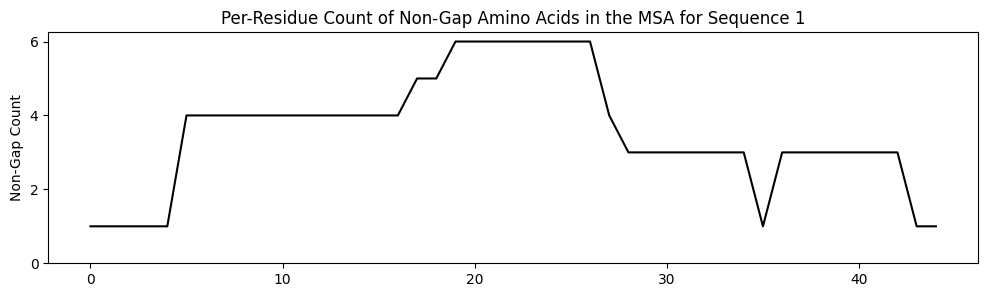

In [7]:
#@title 4. Поиск по генетическим базам данных

#@markdown Once this cell has been executed, you will see
#@markdown statistics about the multiple sequence alignment
#@markdown (MSA) that will be used by AlphaFold. In particular,
#@markdown you’ll see how well each residue is covered by similar
#@markdown sequences in the MSA.

# Track cell execution to ensure correct order
notebook_utils.check_cell_execution_order(executed_cells, 4)

# --- Python imports ---
import collections
import copy
from concurrent import futures
import json
import random
import shutil

from urllib import request
from google.colab import files
from matplotlib import gridspec
import matplotlib.pyplot as plt
import numpy as np
import py3Dmol

from alphafold.model import model
from alphafold.model import config
from alphafold.model import data

from alphafold.data import feature_processing
from alphafold.data import msa_pairing
from alphafold.data import pipeline
from alphafold.data import pipeline_multimer
from alphafold.data.tools import jackhmmer

from alphafold.common import confidence
from alphafold.common import protein

from alphafold.relax import relax
from alphafold.relax import utils

from IPython import display
from ipywidgets import GridspecLayout
from ipywidgets import Output

# Color bands for visualizing plddt
PLDDT_BANDS = [(0, 50, '#FF7D45'),
               (50, 70, '#FFDB13'),
               (70, 90, '#65CBF3'),
               (90, 100, '#0053D6')]

# --- Find the closest source ---
test_url_pattern = 'https://storage.googleapis.com/alphafold-colab{:s}/latest/uniref90_2022_01.fasta.1'
ex = futures.ThreadPoolExecutor(3)
def fetch(source):
  request.urlretrieve(test_url_pattern.format(source))
  return source
fs = [ex.submit(fetch, source) for source in ['', '-europe', '-asia']]
source = None
for f in futures.as_completed(fs):
  source = f.result()
  ex.shutdown()
  break

JACKHMMER_BINARY_PATH = '/usr/bin/jackhmmer'
DB_ROOT_PATH = f'https://storage.googleapis.com/alphafold-colab{source}/latest/'
# The z_value is the number of sequences in a database.
MSA_DATABASES = [
    {'db_name': 'uniref90',
     'db_path': f'{DB_ROOT_PATH}uniref90_2022_01.fasta',
     'num_streamed_chunks': 62,
     'z_value': 144_113_457},
    {'db_name': 'smallbfd',
     'db_path': f'{DB_ROOT_PATH}bfd-first_non_consensus_sequences.fasta',
     'num_streamed_chunks': 17,
     'z_value': 65_984_053},
    {'db_name': 'mgnify',
     'db_path': f'{DB_ROOT_PATH}mgy_clusters_2022_05.fasta',
     'num_streamed_chunks': 120,
     'z_value': 623_796_864},
]

# Search UniProt and construct the all_seq features only for heteromers, not homomers.
if model_type_to_use == ModelType.MULTIMER and len(set(sequences)) > 1:
  MSA_DATABASES.extend([
      # Swiss-Prot and TrEMBL are concatenated together as UniProt.
      {'db_name': 'uniprot',
       'db_path': f'{DB_ROOT_PATH}uniprot_2021_04.fasta',
       'num_streamed_chunks': 101,
       'z_value': 225_013_025 + 565_928},
  ])

TOTAL_JACKHMMER_CHUNKS = sum([cfg['num_streamed_chunks'] for cfg in MSA_DATABASES])

MAX_HITS = {
    'uniref90': 10_000,
    'smallbfd': 5_000,
    'mgnify': 501,
    'uniprot': 50_000,
}


def get_msa(sequences):
  """Searches for MSA for given sequences using chunked Jackhmmer search.

  Args:
    sequences: A list of sequences to search against all databases.

  Returns:
    A dictionary mapping unique sequences to dicionaries mapping each database
    to a list of  results, one for each chunk of the database.
  """
  sequence_to_fasta_path = {}
  # Deduplicate to not do redundant work for multiple copies of the same chain in homomers.
  for sequence_index, sequence in enumerate(sorted(set(sequences)), 1):
    fasta_path = f'target_{sequence_index:02d}.fasta'
    with open(fasta_path, 'wt') as f:
      f.write(f'>query\n{sequence}')
    sequence_to_fasta_path[sequence] = fasta_path

  # Run the search against chunks of genetic databases (since the genetic
  # databases don't fit in Colab disk).
  raw_msa_results = {sequence: {} for sequence in sequence_to_fasta_path.keys()}
  print('\nGetting MSA for all sequences')
  with tqdm.notebook.tqdm(total=TOTAL_JACKHMMER_CHUNKS, bar_format=TQDM_BAR_FORMAT) as pbar:
    def jackhmmer_chunk_callback(i):
      pbar.update(n=1)

    for db_config in MSA_DATABASES:
      db_name = db_config['db_name']
      pbar.set_description(f'Searching {db_name}')
      jackhmmer_runner = jackhmmer.Jackhmmer(
          binary_path=JACKHMMER_BINARY_PATH,
          database_path=db_config['db_path'],
          get_tblout=True,
          num_streamed_chunks=db_config['num_streamed_chunks'],
          streaming_callback=jackhmmer_chunk_callback,
          z_value=db_config['z_value'])
      # Query all unique sequences against each chunk of the database to prevent
      # redunantly fetching each chunk for each unique sequence.
      results = jackhmmer_runner.query_multiple(list(sequence_to_fasta_path.values()))
      for sequence, result_for_sequence in zip(sequence_to_fasta_path.keys(), results):
        raw_msa_results[sequence][db_name] = result_for_sequence

  return raw_msa_results


features_for_chain = {}
raw_msa_results_for_sequence = get_msa(sequences)
for sequence_index, sequence in enumerate(sequences, start=1):
  raw_msa_results = copy.deepcopy(raw_msa_results_for_sequence[sequence])

  # Extract the MSAs from the Stockholm files.
  # NB: deduplication happens later in pipeline.make_msa_features.
  single_chain_msas = []
  uniprot_msa = None
  for db_name, db_results in raw_msa_results.items():
    merged_msa = notebook_utils.merge_chunked_msa(
        results=db_results, max_hits=MAX_HITS.get(db_name))
    if merged_msa.sequences and db_name != 'uniprot':
      single_chain_msas.append(merged_msa)
      msa_size = len(set(merged_msa.sequences))
      print(f'{msa_size} unique sequences found in {db_name} for sequence {sequence_index}')
    elif merged_msa.sequences and db_name == 'uniprot':
      uniprot_msa = merged_msa

  notebook_utils.show_msa_info(single_chain_msas=single_chain_msas, sequence_index=sequence_index)

  # Turn the raw data into model features.
  feature_dict = {}
  feature_dict.update(pipeline.make_sequence_features(
      sequence=sequence, description='query', num_res=len(sequence)))
  feature_dict.update(pipeline.make_msa_features(msas=single_chain_msas))
  # We don't use templates in AlphaFold Colab notebook, add only empty placeholder features.
  feature_dict.update(notebook_utils.empty_placeholder_template_features(
      num_templates=0, num_res=len(sequence)))

  # Construct the all_seq features only for heteromers, not homomers.
  if model_type_to_use == ModelType.MULTIMER and len(set(sequences)) > 1:
    valid_feats = msa_pairing.MSA_FEATURES + (
        'msa_species_identifiers',
    )
    all_seq_features = {
        f'{k}_all_seq': v for k, v in pipeline.make_msa_features([uniprot_msa]).items()
        if k in valid_feats}
    feature_dict.update(all_seq_features)

  features_for_chain[protein.PDB_CHAIN_IDS[sequence_index - 1]] = feature_dict


# Do further feature post-processing depending on the model type.
if model_type_to_use == ModelType.MONOMER:
  np_example = features_for_chain[protein.PDB_CHAIN_IDS[0]]

elif model_type_to_use == ModelType.MULTIMER:
  all_chain_features = {}
  for chain_id, chain_features in features_for_chain.items():
    all_chain_features[chain_id] = pipeline_multimer.convert_monomer_features(
        chain_features, chain_id)

  all_chain_features = pipeline_multimer.add_assembly_features(all_chain_features)

  np_example = feature_processing.pair_and_merge(
      all_chain_features=all_chain_features)

  # Pad MSA to avoid zero-sized extra_msa.
  np_example = pipeline_multimer.pad_msa(np_example, min_num_seq=512)

executed_cells.add(4)

  0%|          | 0/7 [elapsed: 00:00 remaining: ?]

GridspecLayout(children=(Output(layout=Layout(grid_area='widget001')), Output(layout=Layout(grid_area='widget0…

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

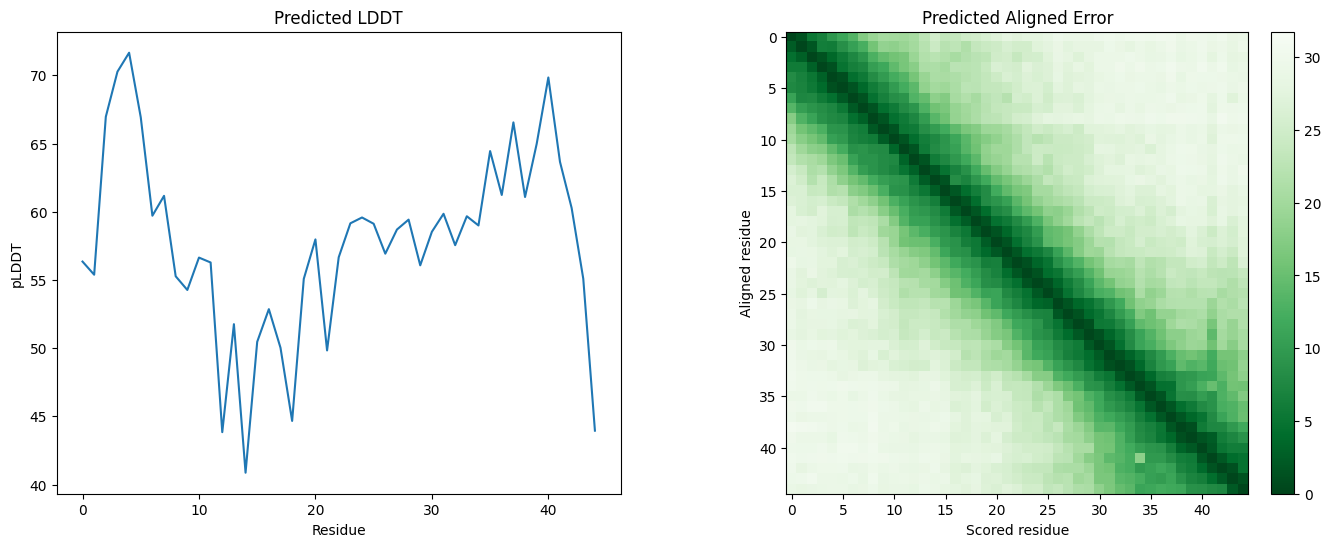

In [8]:
#@title 5. Запуск AlphaFold и загрузка результата

#@markdown Once this cell has been executed, a zip-archive with
#@markdown the obtained prediction will be automatically downloaded
#@markdown to your computer.

#@markdown In case you are having issues with the relaxation stage, you can disable it below.
#@markdown Warning: This means that the prediction might have distracting
#@markdown small stereochemical violations.

run_relax = True  #@param {type:"boolean"}

#@markdown Relaxation is faster with a GPU, but we have found it to be less stable.
#@markdown You may wish to enable GPU for higher performance, but if it doesn't
#@markdown converge we suggested reverting to using without GPU.

relax_use_gpu = False  #@param {type:"boolean"}


#@markdown The multimer model will continue recycling until the predictions stop
#@markdown changing, up to the limit set here. For higher accuracy, at the
#@markdown potential cost of longer inference times, set this to 20.

multimer_model_max_num_recycles = 3  #@param {type:"integer"}

# Track cell execution to ensure correct order
notebook_utils.check_cell_execution_order(executed_cells, 5)

# --- Run the model ---
if model_type_to_use == ModelType.MONOMER:
  model_names = config.MODEL_PRESETS['monomer'] + ('model_2_ptm',)
elif model_type_to_use == ModelType.MULTIMER:
  model_names = config.MODEL_PRESETS['multimer']

output_dir = 'prediction'
os.makedirs(output_dir, exist_ok=True)

plddts = {}
ranking_confidences = {}
pae_outputs = {}
unrelaxed_proteins = {}

with tqdm.notebook.tqdm(total=len(model_names) + 1, bar_format=TQDM_BAR_FORMAT) as pbar:
  for model_name in model_names:
    pbar.set_description(f'Running {model_name}')

    cfg = config.model_config(model_name)

    if model_type_to_use == ModelType.MONOMER:
      cfg.data.eval.num_ensemble = 1
    elif model_type_to_use == ModelType.MULTIMER:
      cfg.model.num_ensemble_eval = 1

    if model_type_to_use == ModelType.MULTIMER:
      cfg.model.num_recycle = multimer_model_max_num_recycles
      cfg.model.recycle_early_stop_tolerance = 0.5

    params = data.get_model_haiku_params(model_name, './alphafold/data')
    model_runner = model.RunModel(cfg, params)
    processed_feature_dict = model_runner.process_features(np_example, random_seed=0)
    prediction = model_runner.predict(processed_feature_dict, random_seed=random.randrange(sys.maxsize))

    mean_plddt = prediction['plddt'].mean()

    if model_type_to_use == ModelType.MONOMER:
      if 'predicted_aligned_error' in prediction:
        pae_outputs[model_name] = (prediction['predicted_aligned_error'],
                                   prediction['max_predicted_aligned_error'])
      else:
        # Monomer models are sorted by mean pLDDT. Do not put monomer pTM models here as they
        # should never get selected.
        ranking_confidences[model_name] = prediction['ranking_confidence']
        plddts[model_name] = prediction['plddt']
    elif model_type_to_use == ModelType.MULTIMER:
      # Multimer models are sorted by pTM+ipTM.
      ranking_confidences[model_name] = prediction['ranking_confidence']
      plddts[model_name] = prediction['plddt']
      pae_outputs[model_name] = (prediction['predicted_aligned_error'],
                                 prediction['max_predicted_aligned_error'])

    # Set the b-factors to the per-residue plddt.
    final_atom_mask = prediction['structure_module']['final_atom_mask']
    b_factors = prediction['plddt'][:, None] * final_atom_mask
    unrelaxed_protein = protein.from_prediction(
        processed_feature_dict,
        prediction,
        b_factors=b_factors,
        remove_leading_feature_dimension=(
            model_type_to_use == ModelType.MONOMER))
    unrelaxed_proteins[model_name] = unrelaxed_protein

    # Delete unused outputs to save memory.
    del model_runner
    del params
    del prediction
    pbar.update(n=1)

  # --- AMBER relax the best model ---

  # Find the best model according to the mean pLDDT.
  best_model_name = max(ranking_confidences.keys(), key=lambda x: ranking_confidences[x])

  if run_relax:
    pbar.set_description(f'AMBER relaxation')
    amber_relaxer = relax.AmberRelaxation(
        max_iterations=0,
        tolerance=2.39,
        stiffness=10.0,
        exclude_residues=[],
        max_outer_iterations=3,
        use_gpu=relax_use_gpu)
    relaxed_pdb, _, _ = amber_relaxer.process(prot=unrelaxed_proteins[best_model_name])
  else:
    print('Warning: Running without the relaxation stage.')
    relaxed_pdb = protein.to_pdb(unrelaxed_proteins[best_model_name])
  pbar.update(n=1)  # Finished AMBER relax.

# Construct multiclass b-factors to indicate confidence bands
# 0=very low, 1=low, 2=confident, 3=very high
banded_b_factors = []
for plddt in plddts[best_model_name]:
  for idx, (min_val, max_val, _) in enumerate(PLDDT_BANDS):
    if plddt >= min_val and plddt <= max_val:
      banded_b_factors.append(idx)
      break
banded_b_factors = np.array(banded_b_factors)[:, None] * final_atom_mask
to_visualize_pdb = utils.overwrite_b_factors(relaxed_pdb, banded_b_factors)


# Write out the prediction
pred_output_path = os.path.join(output_dir, 'selected_prediction.pdb')
with open(pred_output_path, 'w') as f:
  f.write(relaxed_pdb)


# --- Visualise the prediction & confidence ---
show_sidechains = True
def plot_plddt_legend():
  """Plots the legend for pLDDT."""
  thresh = ['Very low (pLDDT < 50)',
            'Low (70 > pLDDT > 50)',
            'Confident (90 > pLDDT > 70)',
            'Very high (pLDDT > 90)']

  colors = [x[2] for x in PLDDT_BANDS]

  plt.figure(figsize=(2, 2))
  for c in colors:
    plt.bar(0, 0, color=c)
  plt.legend(thresh, frameon=False, loc='center', fontsize=20)
  plt.xticks([])
  plt.yticks([])
  ax = plt.gca()
  ax.spines['right'].set_visible(False)
  ax.spines['top'].set_visible(False)
  ax.spines['left'].set_visible(False)
  ax.spines['bottom'].set_visible(False)
  plt.title('Model Confidence', fontsize=20, pad=20)
  return plt

# Show the structure coloured by chain if the multimer model has been used.
if model_type_to_use == ModelType.MULTIMER:
  multichain_view = py3Dmol.view(width=800, height=600)
  multichain_view.addModelsAsFrames(to_visualize_pdb)
  multichain_style = {'cartoon': {'colorscheme': 'chain'}}
  multichain_view.setStyle({'model': -1}, multichain_style)
  multichain_view.zoomTo()
  multichain_view.show()

# Color the structure by per-residue pLDDT
color_map = {i: bands[2] for i, bands in enumerate(PLDDT_BANDS)}
view = py3Dmol.view(width=800, height=600)
view.addModelsAsFrames(to_visualize_pdb)
style = {'cartoon': {'colorscheme': {'prop': 'b', 'map': color_map}}}
if show_sidechains:
  style['stick'] = {}
view.setStyle({'model': -1}, style)
view.zoomTo()

grid = GridspecLayout(1, 2)
out = Output()
with out:
  view.show()
grid[0, 0] = out

out = Output()
with out:
  plot_plddt_legend().show()
grid[0, 1] = out

display.display(grid)

# Display pLDDT and predicted aligned error (if output by the model).
if pae_outputs:
  num_plots = 2
else:
  num_plots = 1

plt.figure(figsize=[8 * num_plots, 6])
plt.subplot(1, num_plots, 1)
plt.plot(plddts[best_model_name])
plt.title('Predicted LDDT')
plt.xlabel('Residue')
plt.ylabel('pLDDT')

if num_plots == 2:
  plt.subplot(1, 2, 2)
  pae, max_pae = list(pae_outputs.values())[0]
  plt.imshow(pae, vmin=0., vmax=max_pae, cmap='Greens_r')
  plt.colorbar(fraction=0.046, pad=0.04)

  # Display lines at chain boundaries.
  best_unrelaxed_prot = unrelaxed_proteins[best_model_name]
  total_num_res = best_unrelaxed_prot.residue_index.shape[-1]
  chain_ids = best_unrelaxed_prot.chain_index
  for chain_boundary in np.nonzero(chain_ids[:-1] - chain_ids[1:]):
    if chain_boundary.size:
      plt.plot([0, total_num_res], [chain_boundary, chain_boundary], color='red')
      plt.plot([chain_boundary, chain_boundary], [0, total_num_res], color='red')

  plt.title('Predicted Aligned Error')
  plt.xlabel('Scored residue')
  plt.ylabel('Aligned residue')

# Save the predicted aligned error (if it exists).
pae_output_path = os.path.join(output_dir, 'predicted_aligned_error.json')
if pae_outputs:
  # Save predicted aligned error in the same format as the AF EMBL DB.
  pae_data = confidence.pae_json(pae=pae, max_pae=max_pae.item())
  with open(pae_output_path, 'w') as f:
    f.write(pae_data)

# --- Download the predictions ---
shutil.make_archive(base_name='prediction', format='zip', root_dir=output_dir)
files.download(f'{output_dir}.zip')

executed_cells.add(5)